In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
df = pd.read_csv(r"C:\Users\Manish Raj\OneDrive\Desktop\KaggleData\used_cars.csv")
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


**it gave information like; $fuel_type, accident, clean_title$..... has many null values**

In [109]:
df.shape

(4009, 12)

In [110]:
df.isna().sum()

brand             0
model             0
model_year        0
milage            0
fuel_type       170
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title     596
price             0
dtype: int64

**It gaves information about count of each feature's null value**
- ----------------------------------------------------------------------------------------------

## Clean Milage column 
- **remove/replace (.),(mi),(,) and convert rest in float value or int** 

In [113]:
df['milage'] = df['milage'].apply(lambda x: float("".join(x.split(" ")[0].split(","))))

In [114]:
df['milage'].dtype

dtype('float64')

In [115]:
df['milage'].isna().sum()

0

- **milage column values converted in float**

In [117]:
df.head(3)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"


In [118]:
df['price'] = (df['price']
               .str.replace('$', '', regex=False)
               .str.replace(',', '', regex=False)
               .astype(float)
              )

In [119]:
df['price'].dtype

dtype('float64')

In [120]:
df.head(3)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300.0
1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005.0
2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,54598.0


In [121]:
def encode_column_based_on_price(Dframe, x):
    encode_to_num = {}
    val = 0
    for i in Dframe.groupby(x)[['price']].median().sort_values(['price'], ascending = True).index:
        encode_to_num[i] = val
        val += 1
    print(val, "values encoded")
    return Dframe[x].map(encode_to_num), encode_to_num
    

## Encode $brand$ based on $price$

In [123]:
df["encode_brand"], map_brand = encode_column_based_on_price(df, 'brand')

57 values encoded


In [124]:
df[['brand','encode_brand']].head()

,brand,encode_brand
0,Ford,33
1,Hyundai,12
2,Lexus,29
3,INFINITI,16
4,Audi,35


## Encode $model$ based on $price$

In [126]:
df["encode_model"], map_model = encode_column_based_on_price(df, 'model')

1898 values encoded


In [127]:
df[['model','encode_model']].head()

,model,encode_model
0,Utility Police Interceptor Base,265
1,Palisade SEL,1049
2,RX 350 RX 350,1514
3,Q50 Hybrid Sport,467
4,Q3 45 S line Premium Plus,1130


## Encode $model$_$year$ based on $price$

In [129]:
df["encode_model_year"], map_model_year = encode_column_based_on_price(df, 'model_year')

34 values encoded


In [130]:
df[['model_year','encode_model_year']].head()

,model_year,encode_model_year
0,2013,21
1,2021,29
2,2022,30
3,2015,23
4,2021,29


****Plot $encode$_$model$_$year$ and $price$ Graph****

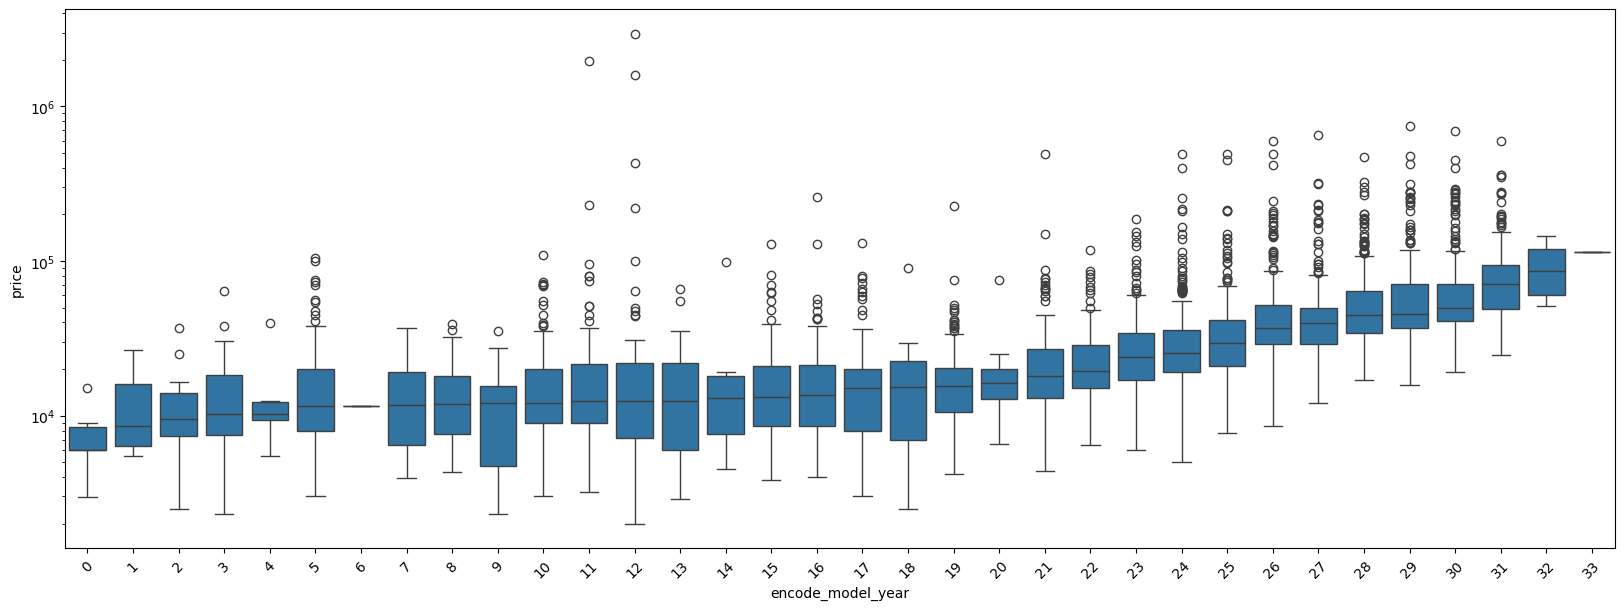

In [132]:
plt.figure(figsize=(20,7))
sns.boxplot(x="encode_model_year", y = "price", data = df)
plt.xticks(rotation = 45)
plt.yscale("log")
plt.show()

## Encode $fuel$_$type$ based on $price$

In [134]:
df["encode_fuel_type"], map_fuel_type = encode_column_based_on_price(df, 'fuel_type')

7 values encoded


In [135]:
df[['fuel_type','encode_fuel_type']].head()

,fuel_type,encode_fuel_type
0,E85 Flex Fuel,2.0
1,Gasoline,3.0
2,Gasoline,3.0
3,Hybrid,6.0
4,Gasoline,3.0


### Most important part Encode $engine$ 
- for each combination we will create a one or more features
- and based on those features, we assign a value

## Text Parsing: 
- Extract structured information from unstructured text 
- Example: Extracting horsepower (HP) and engine size (Liters) from engine descriptions 

In [162]:


# Function to extract structured information from the engine column
def parse_engine(engine):
    if not isinstance(engine, str):  # Handle cases where data might not be a string
        return None, None, None, None, None, None

    parts = engine.split()
    hp, liters, cylinders, is_straight, is_flat, fuel_type = None, None, None, 0, 0, None

    for i, part in enumerate(parts):
        if "HP" in part:
            hp = float(part.replace("HP", ""))
        elif "L" in part and part[0].isdigit():
            liters = float(part.replace("L", ""))
        elif part in ["I4", "V6", "V8", "W12", "Flat", "Straight"]:
            cylinders = part
        elif part == "Straight":
            is_straight = 1
        elif part == "Flat":
            is_flat = 1
        elif part in ["Gasoline", "Diesel", "Electric", "Flex", "Hybrid"]:
            fuel_type = part

    return hp, liters, cylinders, is_straight, is_flat, fuel_type

# Apply function and create new columns
df[['HP', 'Liters', 'Cylinders', 'Straight', 'Flat', 'Fuel_Type']] = df['engine'].apply(parse_engine).apply(pd.Series)

# Display processed DataFrame
df.head()


,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,...,encode_brand,encode_model,encode_model_year,encode_fuel_type,HP,Liters,Cylinders,Straight,Flat,Fuel_Type
0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,...,33,265,21,2.0,300.0,3.7,V6,0.0,0.0,Flex
1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,...,12,1049,29,3.0,NaN,3.8,V6,0.0,0.0,None
2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,...,29,1514,30,3.0,NaN,NaN,NaN,0.0,0.0,NaN
3,INFINITI,Q50 Hybrid Sport,2015,88900.0,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,...,16,467,23,6.0,354.0,3.5,V6,0.0,0.0,Hybrid
4,Audi,Q3 45 S line Premium Plus,2021,9835.0,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,...,35,1130,29,3.0,NaN,2.0,I4,0.0,0.0,None


### Encode $Transmission$ (Gear type)
- **Feature Creation:** 
- Combine or transform existing features to create new ones 
- Example: Creating gear_type from transmission descriptions

In [165]:
def get_gear_type(transmission):
    if 'A/T' in transmission or 'Automatic' in transmission or "At" in transmission:
        if 'M/T' in transmission or 'Manual' in transmission or "Mt" in transmission:
            return 3  # Both
        return 1  # Automatic
    elif 'M/T' in transmission or 'Manual' in transmission or "Mt" in transmission:
        return 2  # Manual
    return 0  # Anything else

# Define function to extract speed value
def get_speed_value(transmission):
    import re
    match = re.search(r'\d+-Speed', transmission)
    if match:
        return float(match.group().split('-')[0])
    if "Speed" in transmission:
        val = transmission.split("Speed")
        if val[0] == "Single-":
            return 1
        return float(val[0])
    if "Spd" in transmission:
        match = re.search(r'\d+-Spd', transmission)
        if match:
            return float(match.group().split('-')[0])
    return np.nan

# Define function to extract specific transmission types
def get_transmission_type(transmission):
    if 'CVT' in transmission:
        return 1
    elif 'Dual Shift Mode' in transmission:
        return 2
    elif 'Overdrive' in transmission:
        return 3
    else:
        return 0

# Apply functions to DataFrame
df['gear_type'] = df['transmission'].apply(get_gear_type)
df['speed_value'] = df['transmission'].apply(get_speed_value)
df['transmission_type'] = df['transmission'].apply(get_transmission_type)

In [185]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,...,encode_fuel_type,HP,Liters,Cylinders,Straight,Flat,Fuel_Type,gear_type,speed_value,transmission_type
0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,...,2.0,300.0,3.7,V6,0.0,0.0,Flex,1,6.0,0
1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,...,3.0,300.0,3.8,V6,0.0,0.0,Gasoline,1,8.0,0
2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,...,3.0,300.0,2.0,V6,0.0,0.0,Gasoline,1,6.0,0
3,INFINITI,Q50 Hybrid Sport,2015,88900.0,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,...,6.0,354.0,3.5,V6,0.0,0.0,Hybrid,1,7.0,0
4,Audi,Q3 45 S line Premium Plus,2021,9835.0,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,...,3.0,300.0,2.0,I4,0.0,0.0,Gasoline,1,8.0,0


**Fill most frequent value in features where value is NAN/missing**

In [178]:
cat_cols = ['speed_value', 'transmission_type', 'Fuel_Type', 'gear_type', 'Cylinders', 'Liters', 'HP', 'encode_fuel_type']

for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\Manish Raj\AppData\Local\Temp\ipykernel_30736\576987904.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
C:\Users\Manish Raj\AppData\Local\Temp\ipykernel_30736\576987904.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



In [180]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,...,encode_fuel_type,HP,Liters,Cylinders,Straight,Flat,Fuel_Type,gear_type,speed_value,transmission_type
0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,...,2.0,300.0,3.7,V6,0.0,0.0,Flex,1,6.0,0
1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,...,3.0,300.0,3.8,V6,0.0,0.0,Gasoline,1,8.0,0
2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,...,3.0,300.0,2.0,V6,0.0,0.0,Gasoline,1,6.0,0
3,INFINITI,Q50 Hybrid Sport,2015,88900.0,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,...,6.0,354.0,3.5,V6,0.0,0.0,Hybrid,1,7.0,0
4,Audi,Q3 45 S line Premium Plus,2021,9835.0,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,...,3.0,300.0,2.0,I4,0.0,0.0,Gasoline,1,8.0,0


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              4009 non-null   object 
 1   model              4009 non-null   object 
 2   model_year         4009 non-null   int64  
 3   milage             4009 non-null   float64
 4   fuel_type          3839 non-null   object 
 5   engine             4009 non-null   object 
 6   transmission       4009 non-null   object 
 7   ext_col            4009 non-null   object 
 8   int_col            4009 non-null   object 
 9   accident           3896 non-null   object 
 10  clean_title        3413 non-null   object 
 11  price              4009 non-null   float64
 12  encode_brand       4009 non-null   int64  
 13  encode_model       4009 non-null   int64  
 14  encode_model_year  4009 non-null   int64  
 15  encode_fuel_type   4009 non-null   float64
 16  HP                 4009 

### Encode $ext$_$col$ and $int$_$col$

In [193]:
df["encode_ext_col"], map_fuel_type = encode_column_based_on_price(df, 'ext_col')
df["encode_int_col"], map_fuel_type = encode_column_based_on_price(df, 'int_col')

319 values encoded
156 values encoded


In [197]:
df[['ext_col','encode_ext_col']].head()

,ext_col,encode_ext_col
0,Black,77
1,Moonlight Cloud,135
2,Blue,69
3,Black,77
4,Glacier White Metallic,110


In [199]:
df[['int_col','encode_int_col']].head()

,int_col,encode_int_col
0,Black,40
1,Gray,10
2,Black,40
3,Black,40
4,Black,40


In [201]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,...,Liters,Cylinders,Straight,Flat,Fuel_Type,gear_type,speed_value,transmission_type,encode_ext_col,encode_int_col
0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,...,3.7,V6,0.0,0.0,Flex,1,6.0,0,77,40
1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,...,3.8,V6,0.0,0.0,Gasoline,1,8.0,0,135,10
2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,...,2.0,V6,0.0,0.0,Gasoline,1,6.0,0,69,40
3,INFINITI,Q50 Hybrid Sport,2015,88900.0,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,...,3.5,V6,0.0,0.0,Hybrid,1,7.0,0,77,40
4,Audi,Q3 45 S line Premium Plus,2021,9835.0,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,...,2.0,I4,0.0,0.0,Gasoline,1,8.0,0,110,40


## Lets encode $accident$

In [204]:
df['accident'].value_counts()

accident
None reported                             2910
At least 1 accident or damage reported     986
Name: count, dtype: int64

In [206]:
map_accident = {"None reported": 0, "At least 1 accident or damage reported": 1}
df["encode_accident"] = df["accident"].map(map_accident)

In [208]:
df.head(3)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,...,Cylinders,Straight,Flat,Fuel_Type,gear_type,speed_value,transmission_type,encode_ext_col,encode_int_col,encode_accident
0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,...,V6,0.0,0.0,Flex,1,6.0,0,77,40,1.0
1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,...,V6,0.0,0.0,Gasoline,1,8.0,0,135,10,1.0
2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,...,V6,0.0,0.0,Gasoline,1,6.0,0,69,40,0.0


In [210]:
df[['accident','encode_accident']].head()

,accident,encode_accident
0,At least 1 accident or damage reported,1.0
1,At least 1 accident or damage reported,1.0
2,None reported,0.0
3,None reported,0.0
4,None reported,0.0


## The $price$ value is too big thats why we take log of price

## Log Transformation: 
- Apply logarithm to reduce skewness in data 
- Example: log10(price) makes price distributions more normal 
- Helps models handle wide value ranges 

In [213]:
df['log10_price'] = np.log10(df.price)
df[['price','log10_price']].head()

,price,log10_price
0,10300.0,4.012837
1,38005.0,4.579841
2,54598.0,4.737177
3,15500.0,4.190332
4,34999.0,4.544056


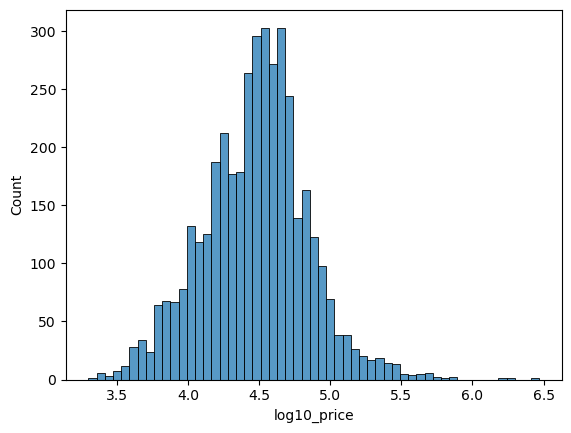

In [217]:
sns.histplot(df.log10_price)
plt.show()

### do same for milage (use log10)

In [222]:
df['log10_milage'] = np.log10(df.milage)
df[['milage','log10_milage']].head()

,milage,log10_milage
0,51000.0,4.707570
1,34742.0,4.540855
2,22372.0,4.349705
3,88900.0,4.948902
4,9835.0,3.992774


In [224]:
df['HP'].head()

0    300.0
1    300.0
2    300.0
3    354.0
4    300.0
Name: HP, dtype: float64

### encode cylinders

In [239]:
df["Cylinder_encode"] =  df["Cylinders"].astype("category").cat.codes

In [243]:
varsel = ["encode_brand", "encode_model", "model_year","encode_model_year", "log10_milage", "encode_fuel_type",
          "HP", "Liters", "Cylinder_encode", "Straight", "Flat", "gear_type", "transmission_type", "speed_value",
          "encode_ext_col", "encode_int_col", "encode_accident", "log10_price"]
varsel

['encode_brand',
 'encode_model',
 'model_year',
 'encode_model_year',
 'log10_milage',
 'encode_fuel_type',
 'HP',
 'Liters',
 'Cylinder_encode',
 'Straight',
 'Flat',
 'gear_type',
 'transmission_type',
 'speed_value',
 'encode_ext_col',
 'encode_int_col',
 'encode_accident',
 'log10_price']

In [245]:
df_sel = df[varsel].copy()
df_sel.head()

,encode_brand,encode_model,model_year,encode_model_year,log10_milage,encode_fuel_type,HP,Liters,Cylinder_encode,Straight,Flat,gear_type,transmission_type,speed_value,encode_ext_col,encode_int_col,encode_accident,log10_price
0,33,265,2013,21,4.707570,2.0,300.0,3.7,3,0.0,0.0,1,0,6.0,77,40,1.0,4.012837
1,12,1049,2021,29,4.540855,3.0,300.0,3.8,3,0.0,0.0,1,0,8.0,135,10,1.0,4.579841
2,29,1514,2022,30,4.349705,3.0,300.0,2.0,3,0.0,0.0,1,0,6.0,69,40,0.0,4.737177
3,16,467,2015,23,4.948902,6.0,354.0,3.5,3,0.0,0.0,1,0,7.0,77,40,0.0,4.190332
4,35,1130,2021,29,3.992774,3.0,300.0,2.0,1,0.0,0.0,1,0,8.0,110,40,0.0,4.544056


In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              4009 non-null   object 
 1   model              4009 non-null   object 
 2   model_year         4009 non-null   int64  
 3   milage             4009 non-null   float64
 4   fuel_type          3839 non-null   object 
 5   engine             4009 non-null   object 
 6   transmission       4009 non-null   object 
 7   ext_col            4009 non-null   object 
 8   int_col            4009 non-null   object 
 9   accident           3896 non-null   object 
 10  clean_title        3413 non-null   object 
 11  price              4009 non-null   float64
 12  encode_brand       4009 non-null   int64  
 13  encode_model       4009 non-null   int64  
 14  encode_model_year  4009 non-null   int64  
 15  encode_fuel_type   4009 non-null   float64
 16  HP                 4009 

## lets calculate correlation matrix

## Correlation Analysis 
- **Understanding relationships between features:** 
- Positive correlation: Variables move together 
- Negative correlation: Variables move in opposite directions 
- No correlation: Variables are independent 
- Highly correlated features may be redundant and can be removed to simplify models.

In [248]:
corr = df_sel.corr()

In [250]:
corr

,encode_brand,encode_model,model_year,encode_model_year,log10_milage,encode_fuel_type,HP,Liters,Cylinder_encode,Straight,Flat,gear_type,transmission_type,speed_value,encode_ext_col,encode_int_col,encode_accident,log10_price
encode_brand,1.000000,0.505049,0.171301,0.167893,-0.241879,0.061720,0.397718,0.143350,-0.106314,NaN,NaN,-0.066648,0.006922,0.068880,0.172575,0.190901,-0.111466,0.493294
encode_model,0.505049,1.000000,0.597360,0.591828,-0.613040,0.159303,0.588364,0.213466,-0.047678,NaN,NaN,-0.070055,0.028946,0.240747,0.319823,0.355631,-0.264699,0.906698
model_year,0.171301,0.597360,1.000000,0.919799,-0.575395,0.205547,0.228230,-0.137273,0.018696,NaN,NaN,-0.186357,0.021185,0.301962,0.281019,0.297500,-0.199087,0.625215
encode_model_year,0.167893,0.591828,0.919799,1.000000,-0.550343,0.158129,0.225263,-0.152400,0.016477,NaN,NaN,-0.176407,0.017808,0.290765,0.276744,0.285072,-0.201812,0.623817
log10_milage,-0.241879,-0.613040,-0.575395,-0.550343,1.000000,-0.124072,-0.299124,0.069469,0.049830,NaN,NaN,0.011709,0.011863,-0.162718,-0.287230,-0.291936,0.289717,-0.687224
encode_fuel_type,0.061720,0.159303,0.205547,0.158129,-0.124072,1.000000,-0.020544,-0.023000,-0.048941,NaN,NaN,-0.079908,0.026625,0.058634,0.047115,0.019803,-0.032094,0.146625
HP,0.397718,0.588364,0.228230,0.225263,-0.299124,-0.020544,1.000000,0.462900,-0.037498,NaN,NaN,-0.097579,0.108404,0.100870,-0.001036,0.115725,-0.104919,0.554184
Liters,0.143350,0.213466,-0.137273,-0.152400,0.069469,-0.023000,0.462900,1.000000,0.206222,NaN,NaN,-0.018589,0.000233,0.126155,0.037719,-0.017261,0.044627,0.199787
Cylinder_encode,-0.106314,-0.047678,0.018696,0.016477,0.049830,-0.048941,-0.037498,0.206222,1.000000,NaN,NaN,-0.075067,-0.023368,-0.040624,0.155373,0.069680,0.027426,-0.051264
Straight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## lets create heatmap also

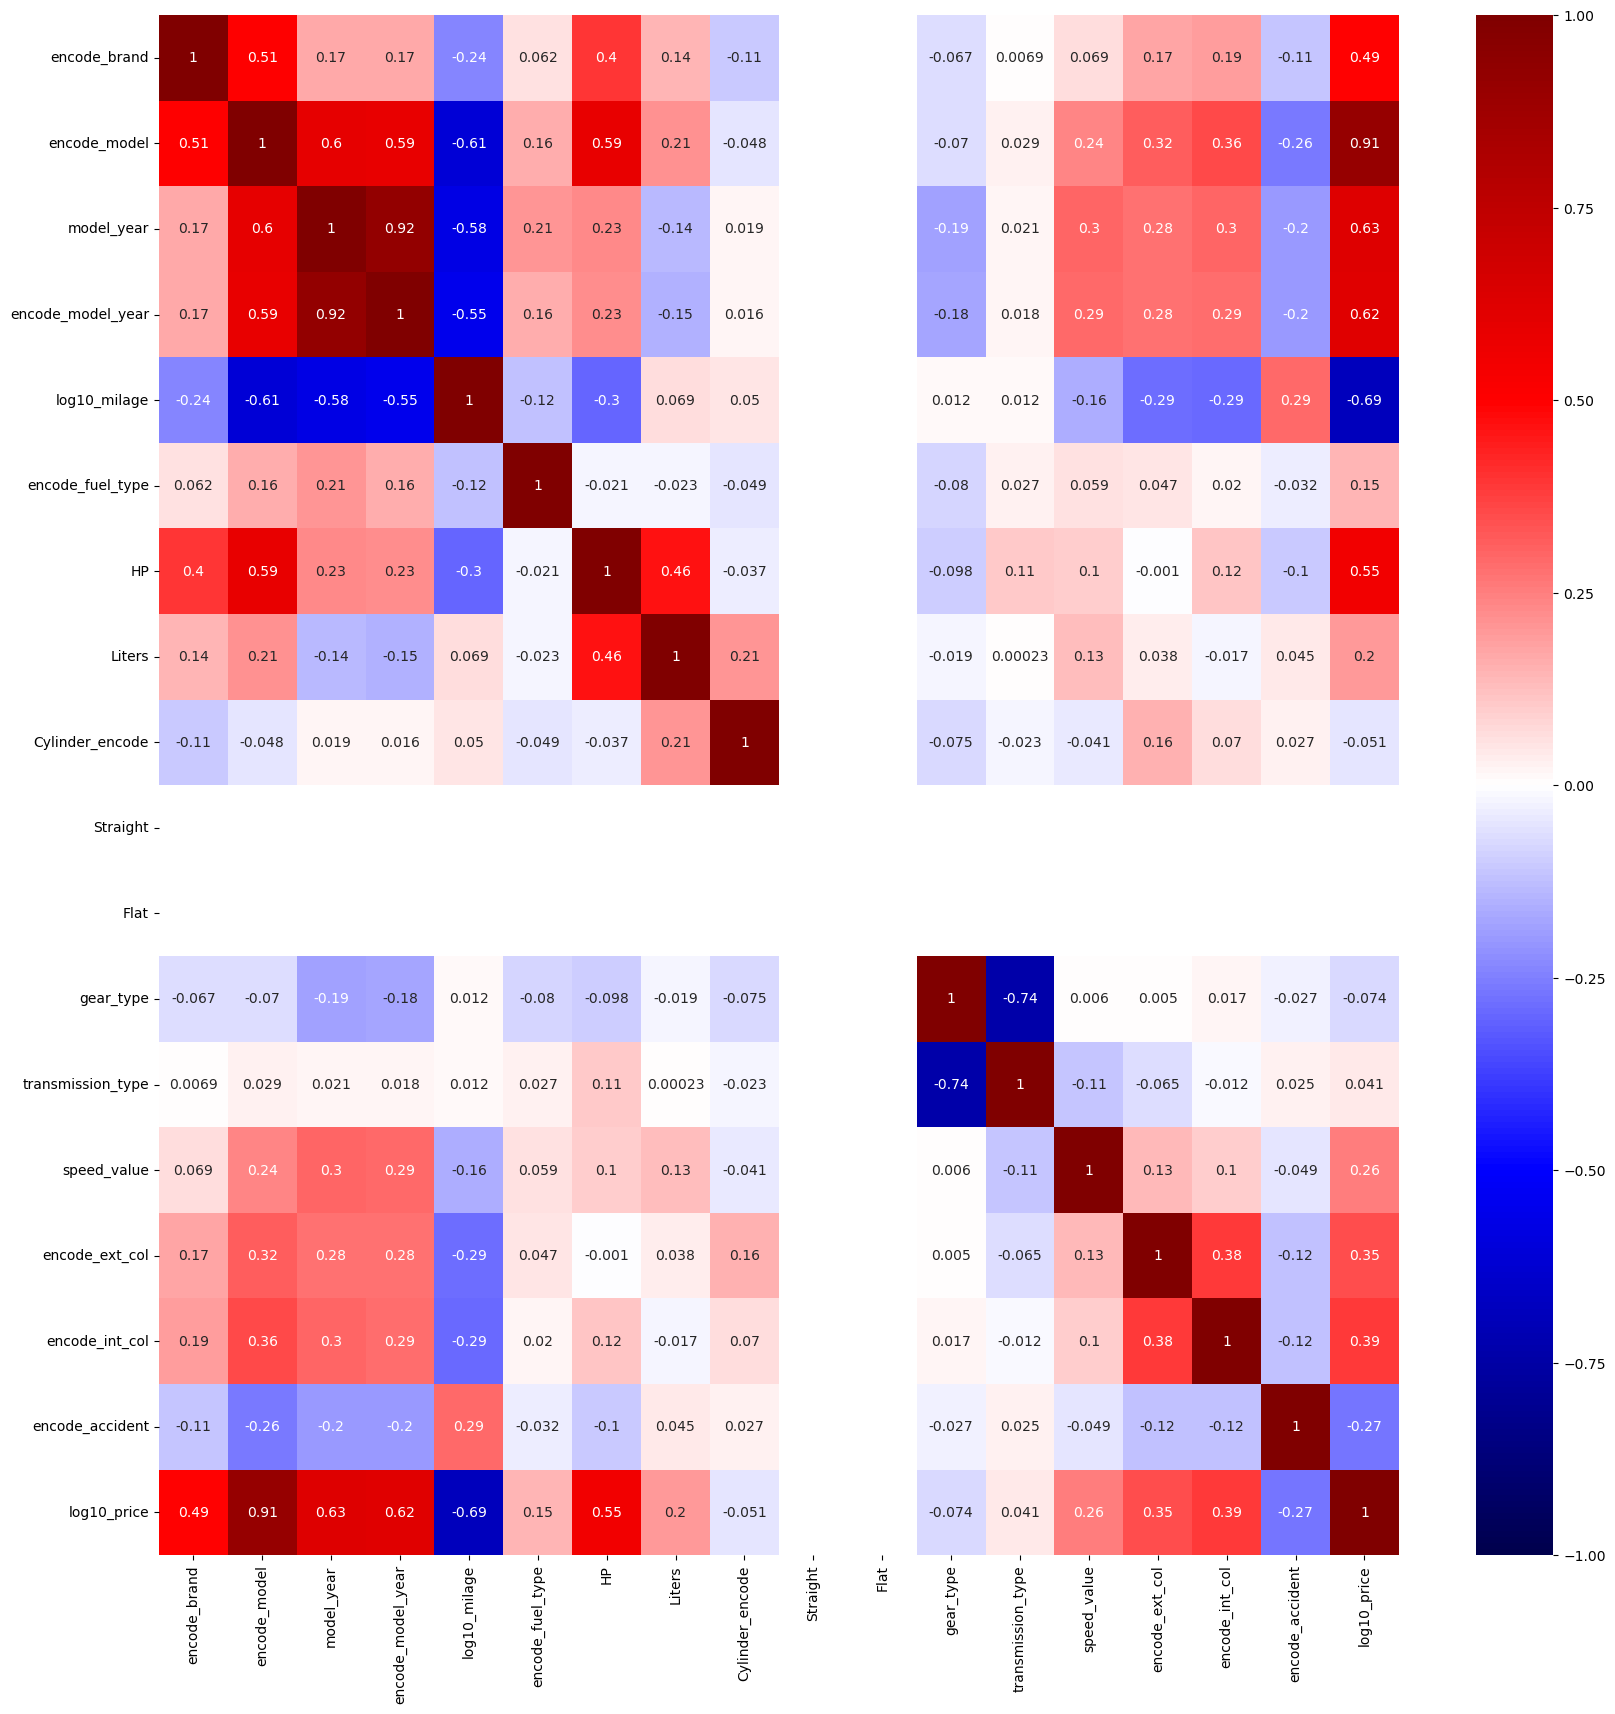

In [253]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap="seismic", vmin=-1, vmax =1)
plt.show()

## Why Preprocessing Matters 
**Raw data often contains issues that prevent machine learning models from performing optimally. 
Proper preprocessing improves model accuracy, reduces training time, and ensures reliable 
predictions.**

### Feature Encoding 
- Purpose: Convert categorical variables into numerical format that models can process.
### Ordinal Encoding: 
- Assigns numerical values based on a meaningful order 
- Example: Encoding car brands by median price (cheaper brands get lower numbers) 
- Preserves inherent ranking in the data

### Label Encoding: 
- Assigns unique numbers to categories 
- Useful when categories have no inherent order 
- Simple mapping like: "Yes"=1, "No"=0